### Data Reading and Exploring

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
import pandas as pd
import numpy as np

In [2]:
def calculate_perf_metrics(var, stockprices):
    train_size = int(0.8*len(stockprices))
    y_pred, y_true = np.array(stockprices[train_size:][var]), np.array(stockprices[train_size:]['Close'])
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100
    return rmse, mape

In [3]:
def plot_stock_trend_sma(var, window_size, stockprices, name):
    stockprices[var] = stockprices['Close'].rolling(window_size).mean()
    ax = stockprices[['Close', var]].plot(figsize=(15,6))
    plt.grid(True)
    plt.title('Simple Moving Averages: '+ name)
    plt.axis('tight')
    plt.ylabel('Stock Price ($)')

In [4]:
def plot_stock_trend_ema(var, window_size, stockprices, name):
    stockprices[var] = stockprices['Close'].ewm(span=window_size, adjust=False).mean()
    ax = stockprices[['Close', var]].plot(figsize=(15,6))
    plt.grid(True)
    plt.title('Exponential Moving Averages: ' + name)
    plt.axis('tight')
    plt.ylabel('Stock Price ($)')

### Cognizant

In [5]:
cognizant = pd.read_csv('Cognizant share prices 2019_2021.csv')
print(cognizant.shape)
print(cognizant.head())
cognizant.isnull().sum()

(694, 6)
         Date       Open       High        Low      Close   Volume
0  2019-01-02  62.500000  63.810001  62.500000  63.090000  3045600
1  2019-01-03  62.360001  62.970001  61.009998  61.099998  3895700
2  2019-01-04  62.279999  63.799999  61.950001  63.700001  4885600
3  2019-01-07  63.349998  63.970001  62.799999  63.599998  3940400
4  2019-01-08  64.269997  64.430000  63.439999  64.320000  3427500


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

px.line(cognizant, x = 'Date', y = 'Close', title = 'Stock Trend of Cognizant')

In [7]:
# import plotly.graph_objects as gr_plt

# fig = gr_plt.Figure(data = [gr_plt.Candlestick(x = cognizant['Date'],
#                 open = cognizant['Open'], high = cognizant['High'],
#                 low = cognizant['Low'], close = cognizant['Close'])
#                      ])

# fig.update_layout(xaxis_rangeslider_visible=False)
# fig.show()

Enter the window size: 2
RMSE:  0.4969008205929116 
MAPE:  0.45310301596604646


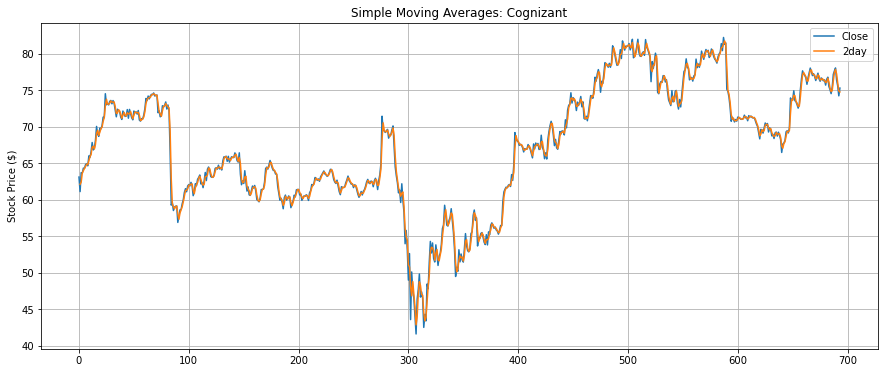

In [8]:
window_size = int(input('Enter the window size: '))
window_var = str(window_size) + 'day'
### Plot and performance metrics for SMA model
plot_stock_trend_sma(window_var, window_size, cognizant, 'Cognizant')
rmse_sma, mape_sma = calculate_perf_metrics(window_var,cognizant)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

RMSE:  0.3545593718560683 
MAPE:  0.3165069412805116


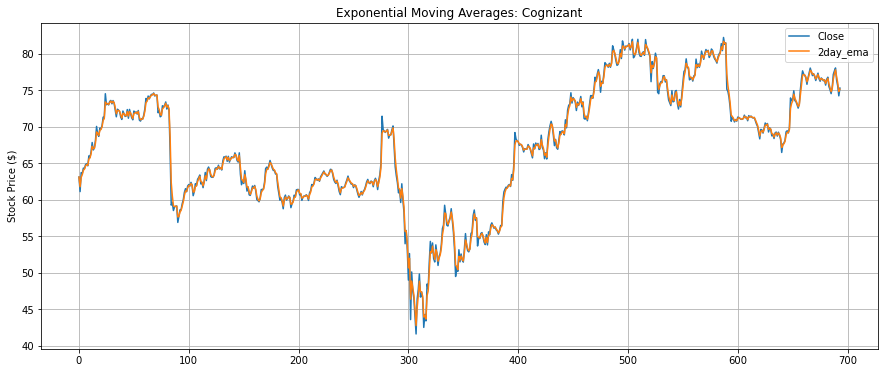

In [9]:
window_ema_var = str(window_size) + 'day_ema'
### Plot and performance metrics for EMA model
plot_stock_trend_ema(window_ema_var, window_size, cognizant, 'Cognizant')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, cognizant)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

In [10]:
cognizant['Year'] = pd.DatetimeIndex(cognizant['Date']).year
cognizant['Month'] = pd.DatetimeIndex(cognizant['Date']).month

In [11]:
cognizant.groupby('Year').count()

Date  Open  High  Low  Close  Volume  2day  2day_ema  Month
Year                                                             
2019   252   252   252  252    252     252   251       252    252
2020   253   253   253  253    253     253   253       253    253
2021   189   189   189  189    189     189   189       189    189

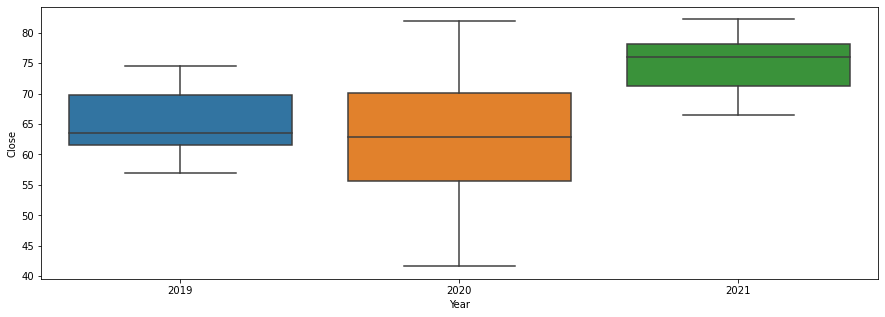

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(cognizant['Year'],cognizant['Close'])

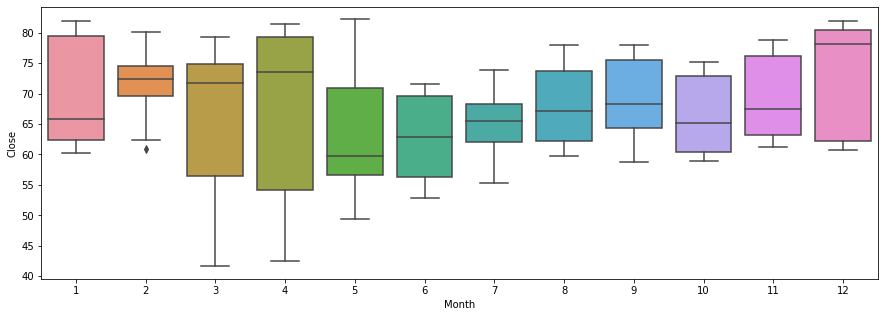

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(cognizant['Month'],cognizant['Close'])

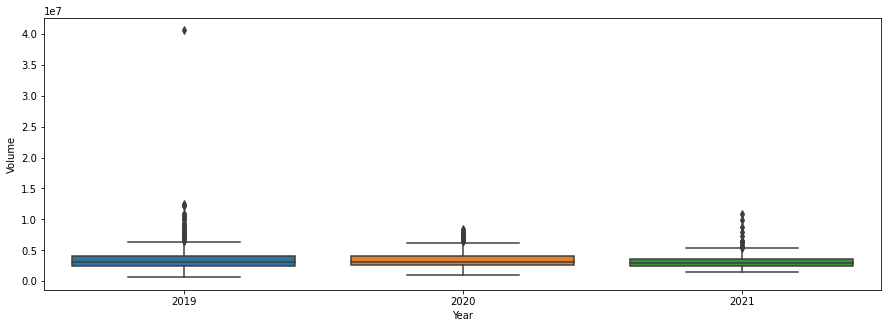

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(cognizant['Year'],cognizant['Volume'])

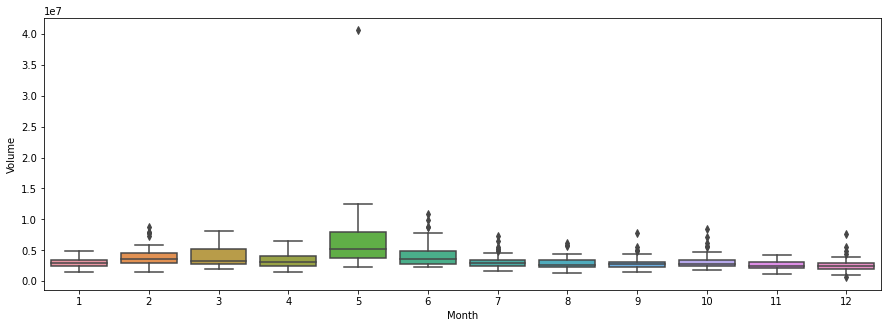

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(cognizant['Month'],cognizant['Volume'])

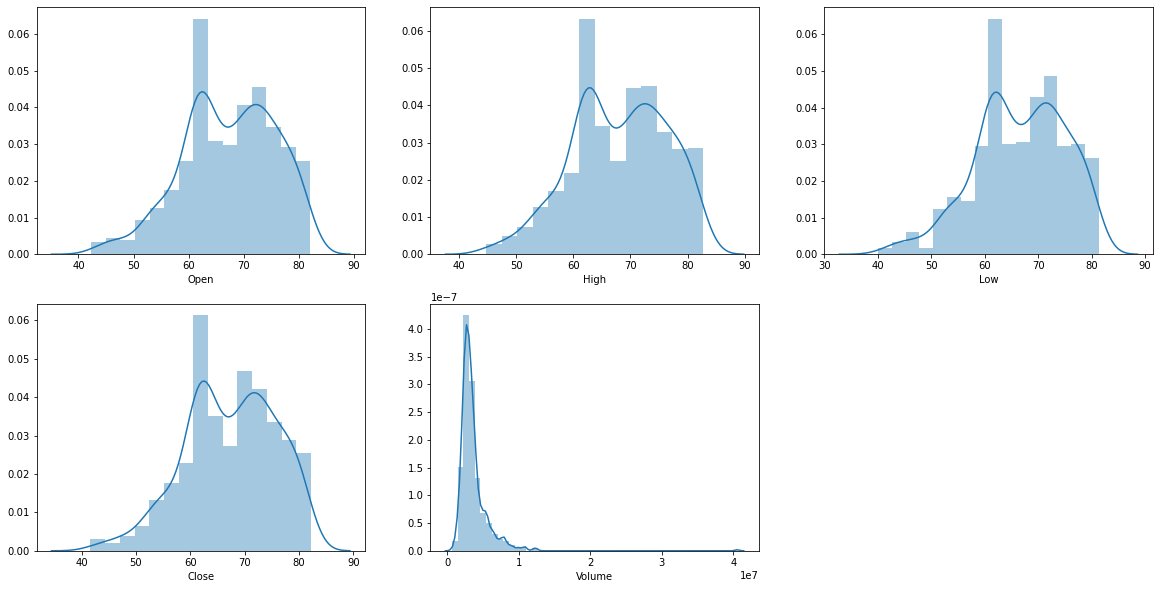

In [16]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(cognizant[col])

In [17]:
# df = cognizant.copy()
# df['revenue']  = df['High'] - df['Close']
# df['target'] = np.where(df['Close'].shift(1) > df['Close'], 1, 0)

In [18]:
# df.head()

In [19]:
# plt.pie(df['target'].value_counts().values,
#         labels=[0, 1], autopct='%1.1f%%')
# plt.show()

In [20]:
cognizant['return'] = cognizant['Close'].pct_change()*100
cognizant.head()

Date       Open       High        Low      Close   Volume       2day  \
0  2019-01-02  62.500000  63.810001  62.500000  63.090000  3045600        NaN   
1  2019-01-03  62.360001  62.970001  61.009998  61.099998  3895700  62.094999   
2  2019-01-04  62.279999  63.799999  61.950001  63.700001  4885600  62.399999   
3  2019-01-07  63.349998  63.970001  62.799999  63.599998  3940400  63.649999   
4  2019-01-08  64.269997  64.430000  63.439999  64.320000  3427500  63.959999   

    2day_ema  Year  Month    return  
0  63.090000  2019      1       NaN  
1  61.763332  2019      1 -3.154227  
2  63.054445  2019      1  4.255324  
3  63.418147  2019      1 -0.156991  
4  64.019382  2019      1  1.132079

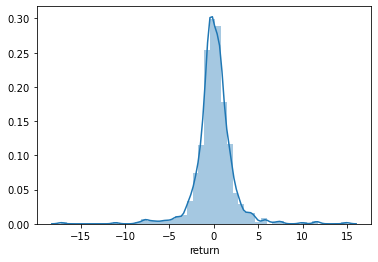

In [21]:
sns.distplot(cognizant['return'])

In [22]:
# sns.distplot(df['revenue'])

In [23]:
px.line(cognizant, x = 'Date', y = 'return', title = 'Return of Cognizant')

In [24]:
px.line(cognizant, x = 'Date', y = 'Volume', title = 'Volume of Cognizant')

In [25]:
# px.line(df, x = 'Date', y = 'revenue', title = 'Revenue of Cognizant')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



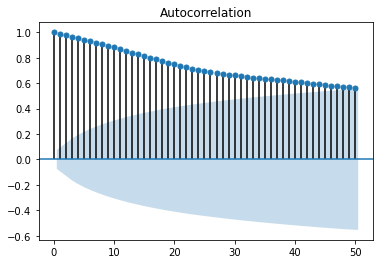

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(cognizant['Close'],lags=50)
plt.show()

In [80]:
def seqX_seqY(data, N):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset 
        N - window size, e.g., 60 for 60 days 
    """
    X, Y = [], []
    for i in range(N, len(data)):
        X.append(data['Close'][i-N:i])
        Y.append(data['Close'][i])
    
    return np.array(X), np.array(Y)

In [165]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

def model_training(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    
    ## Model 1: Linear regression
    LR_cog = linear_model.LinearRegression()
    m = LR_cog.fit(X_train, Y_train)
    print('Coefficients of linear regressor: ', LR_cog.coef_)
    print('Linear Regression score: {}'.format(LR_cog.score(X_test, Y_test)*100))

    ## Model 2: Random Forest Regressor
    RFR_cog = RandomForestRegressor()
    RFR_cog.fit(X_train, Y_train) 
    print('Random forest regressor score: {}'.format(RFR_cog.score(X_test, Y_test)*100))

    ## Model 3: Support Vector Regressor
    SVR_cog = SVR(kernel='linear')
    SVR_cog.fit(X_train, Y_train)
    print('Support Vector regressor score: {}'.format(SVR_cog.score(X_test, Y_test)*100))
    
    return m

In [166]:
## Cognizant:
X_cog, Y_cog = seqX_seqY(cognizant, 2)
m_cog = model_training(X_cog, Y_cog)

Coefficients of linear regressor:  [0.11622192 0.87152287]
Linear Regression score: 97.87355439775052
Random forest regressor score: 97.30996863243037
Support Vector regressor score: 97.84199616493991


Text(0.5, 1.0, 'Linear Regression fitting plot: Cognizant stock price')

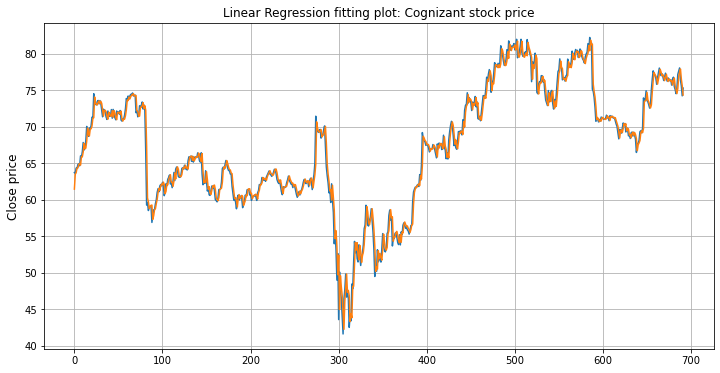

In [170]:
Y_pcog = m_cog.predict(X_cog)
plt.figure(figsize=(12,6))
plt.plot(Y_cog)
plt.plot(Y_pcog)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: Cognizant stock price', fontsize=12)

In [48]:
HCL = pd.read_csv('HCL Technologies share prices 2019_2021.csv')
print(HCL.shape)
print(HCL.head())
HCL.isnull().sum()

(249, 6)
         Date        Open        High         Low       Close      Volume
0  2020-10-05  828.799988  839.200012  815.099976  824.200012  11889998.0
1  2020-10-06  830.000000  834.500000  822.700012  829.150024   7848500.0
2  2020-10-07  830.000000  830.599976  823.000000  828.049988   6980002.0
3  2020-10-08  857.500000  879.000000  844.500000  849.549988  25860257.0
4  2020-10-09  852.900024  862.500000  849.299988  855.750000   7286954.0


Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [77]:
HCL = HCL.dropna()
HCL = HCL.set_index(pd.Index(range(0,len(HCL))))

In [64]:
px.line(HCL, x = 'Date', y = 'Close', title = 'Stock Trend of HCL')

RMSE:  9.434080609531712 
MAPE:  0.6155127721564533


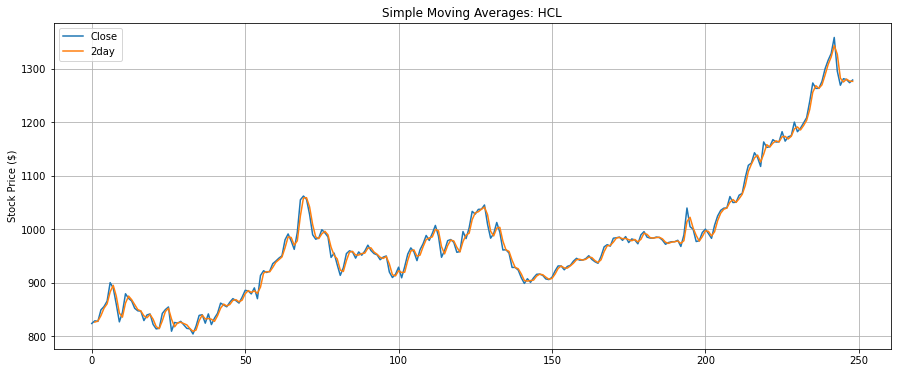

In [65]:
plot_stock_trend_sma(window_var, window_size, HCL, 'HCL')
rmse_sma, mape_sma = calculate_perf_metrics(window_var, HCL)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

RMSE:  6.775146661181154 
MAPE:  0.4372532253165859


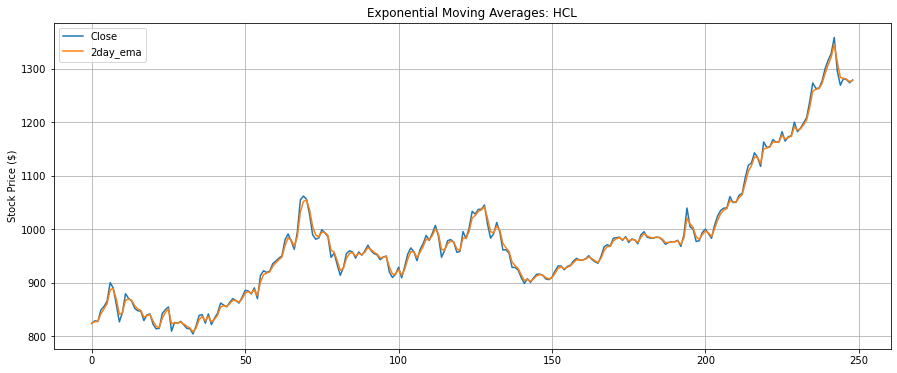

In [66]:
plot_stock_trend_ema(window_ema_var, window_size, HCL, 'HCL')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, HCL)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

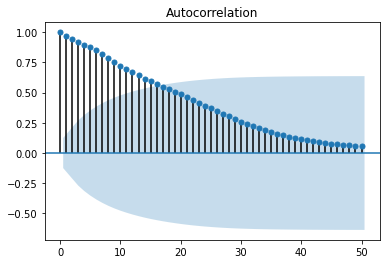

In [113]:
plot_acf(HCL['Close'],lags=50)
plt.show()

Text(0.5, 1.0, 'HCL monthly variability in stocks')

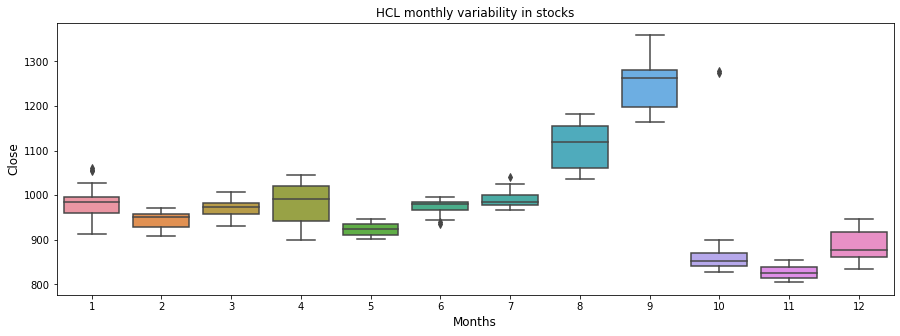

In [125]:
HCL['return'] = HCL['Close'].pct_change()*100
HCL['Year'] = pd.DatetimeIndex(HCL['Date']).year
HCL['Month'] = pd.DatetimeIndex(HCL['Date']).month
plt.figure(figsize=(15,5))
sns.boxplot(HCL['Month'],HCL['Close'])
plt.ylabel('Close', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('HCL monthly variability in stocks')

In [132]:
px.line(HCL, x = 'Date', y = 'return', title = 'Return of HCL')

In [133]:
px.line(HCL, x = 'Date', y = 'Volume', title = 'Volume of HCL')

In [172]:
## HCL:
# print(HCL['Close'][30])
X_hcl, Y_hcl = seqX_seqY(HCL, 2)
m_hcl = model_training(X_hcl, Y_hcl)
# HCL.head(31)

Coefficients of linear regressor:  [-0.01033054  1.00722337]
Linear Regression score: 98.27473274505522
Random forest regressor score: 97.04573975347822
Support Vector regressor score: 98.25179894720661


Text(0.5, 1.0, 'Linear Regression fitting plot: HCL Tech stock price')

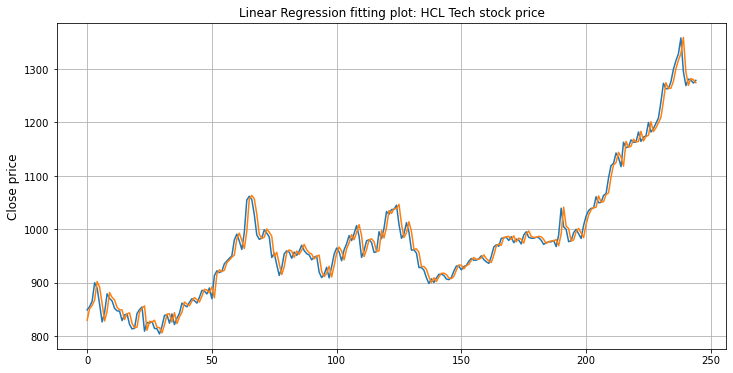

In [173]:
Y_phcl = m_hcl.predict(X_hcl)
plt.figure(figsize=(12,6))
plt.plot(Y_hcl)
plt.plot(Y_phcl)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: HCL Tech stock price', fontsize=12)

In [84]:
HDFC = pd.read_csv('HDFC Bank Share Prices 2019_2021.csv')
print(HDFC.shape)
print(HDFC.head())
HDFC.isnull().sum()

(680, 6)
         Date         Open         High          Low        Close     Volume
0  2019-01-01  1063.824951  1075.500000  1052.800049  1074.050049  3186720.0
1  2019-01-02  1071.400024  1073.750000  1059.849976  1064.250000  4067116.0
2  2019-01-03  1062.099976  1064.125000  1051.500000  1055.900024  6385832.0
3  2019-01-04  1057.625000  1064.250000  1055.175049  1058.724976  3643560.0
4  2019-01-07  1063.849976  1067.675049  1059.000000  1060.324951  2693506.0


Date      0
Open      2
High      2
Low       2
Close     2
Volume    2
dtype: int64

In [85]:
HDFC = HDFC.dropna()
HDFC = HDFC.set_index(pd.Index(range(0,len(HDFC))))

In [86]:
px.line(HDFC, x = 'Date', y = 'Close', title = 'Stock Trend of HDFC')

RMSE:  10.472904971139416 
MAPE:  0.5287488882723815


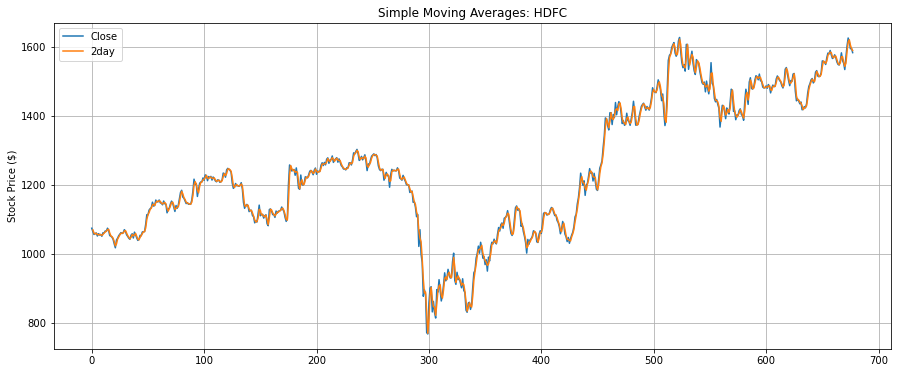

In [87]:
plot_stock_trend_sma(window_var, window_size, HDFC, 'HDFC')
rmse_sma, mape_sma = calculate_perf_metrics(window_var, HDFC)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

RMSE:  7.2892216510407595 
MAPE:  0.3766695064212022


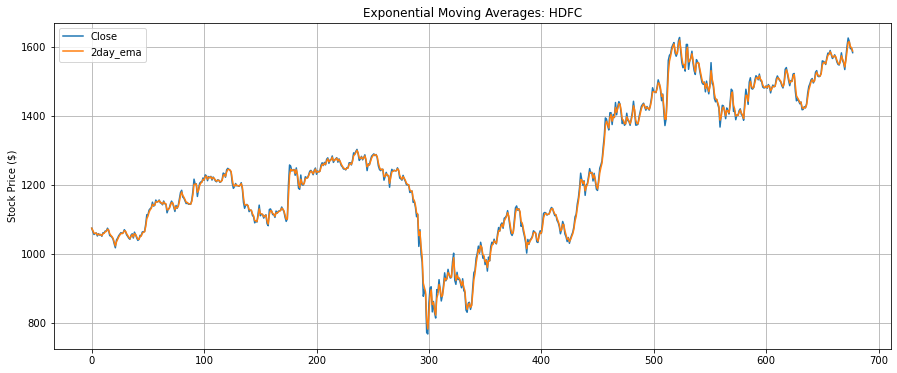

In [88]:
plot_stock_trend_ema(window_ema_var, window_size, HDFC, 'HDFC')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, HDFC)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

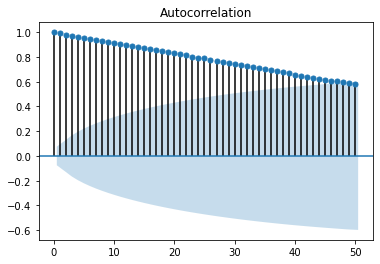

In [114]:
plot_acf(HDFC['Close'],lags=50)
plt.show()

Text(0.5, 1.0, 'HDFC monthly variability in stocks')

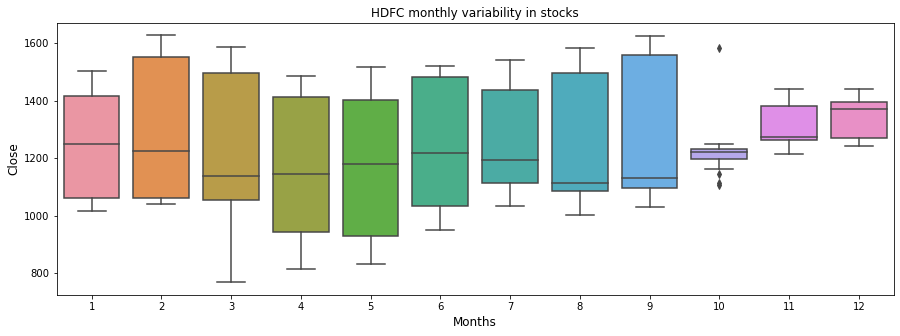

In [126]:
HDFC['return'] = HDFC['Close'].pct_change()*100
HDFC['Year'] = pd.DatetimeIndex(HDFC['Date']).year
HDFC['Month'] = pd.DatetimeIndex(HDFC['Date']).month
plt.figure(figsize=(15,5))
sns.boxplot(HDFC['Month'],HDFC['Close'])
plt.ylabel('Close', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('HDFC monthly variability in stocks')

In [144]:
px.line(HDFC, x = 'Date', y = 'return', title = 'Return of HDFC')

In [145]:
px.line(HDFC, x = 'Date', y = 'Volume', title = 'Volume of HDFC')

In [176]:
## HDFC:
X_hdfc, Y_hdfc = seqX_seqY(HDFC, 2)
m_hdfc = model_training(X_hdfc, Y_hdfc)

Coefficients of linear regressor:  [-0.05148429  1.04797702]
Linear Regression score: 98.85385035693112
Random forest regressor score: 98.29734904075332
Support Vector regressor score: 98.84608172209009


Text(0.5, 1.0, 'Linear Regression fitting plot: HDFC stock price')

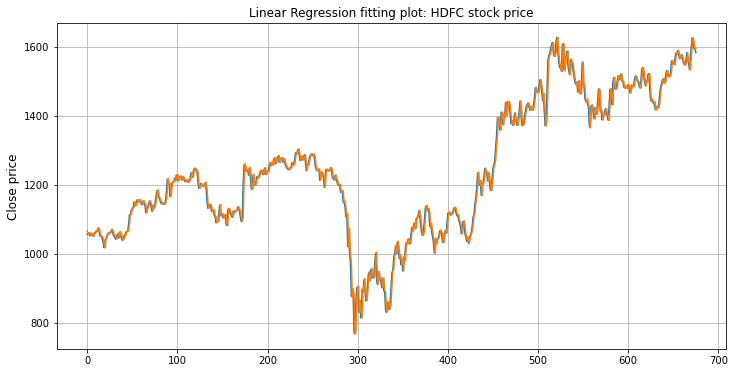

In [177]:
Y_phdfc = m_hdfc.predict(X_hdfc)
plt.figure(figsize=(12,6))
plt.plot(Y_hdfc)
plt.plot(Y_phdfc)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: HDFC stock price', fontsize=12)

In [92]:
ICICI = pd.read_csv('ICICI Bank Share Prices 2019_2021.csv')
print(ICICI.shape)
print(ICICI.head())
ICICI.isnull().sum()

(680, 6)
         Date        Open        High         Low       Close      Volume
0  2019-01-01  361.500000  364.799988  356.399994  363.750000   7759872.0
1  2019-01-02  361.500000  367.899994  360.299988  364.600006  18243156.0
2  2019-01-03  365.000000  367.299988  362.049988  363.250000  12884409.0
3  2019-01-04  361.850006  368.799988  358.049988  365.200012  22896026.0
4  2019-01-07  367.500000  371.000000  366.549988  367.700012  12719847.0


Date      0
Open      2
High      2
Low       2
Close     2
Volume    2
dtype: int64

In [93]:
ICICI = ICICI.dropna()
ICICI = ICICI.set_index(pd.Index(range(0,len(ICICI))))

In [94]:
px.line(ICICI, x = 'Date', y = 'Close', title = 'Stock Trend of ICICI')

RMSE:  5.083932329074961 
MAPE:  0.6310588465902297


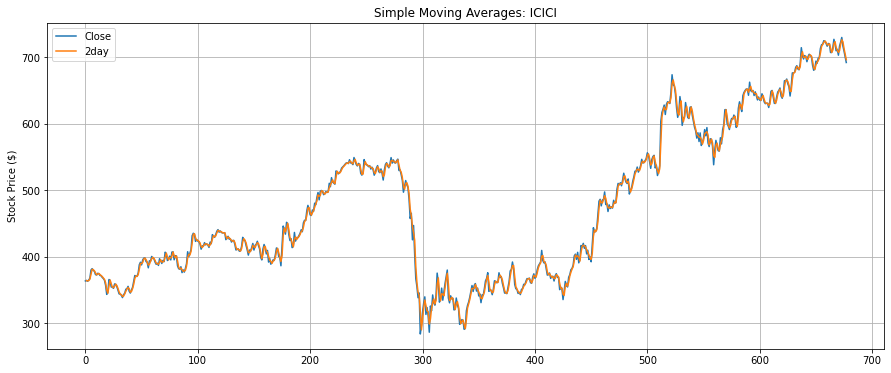

In [96]:
plot_stock_trend_sma(window_var, window_size, ICICI, 'ICICI')
rmse_sma, mape_sma = calculate_perf_metrics(window_var, ICICI)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

RMSE:  3.4888502968922976 
MAPE:  0.4415888016681607


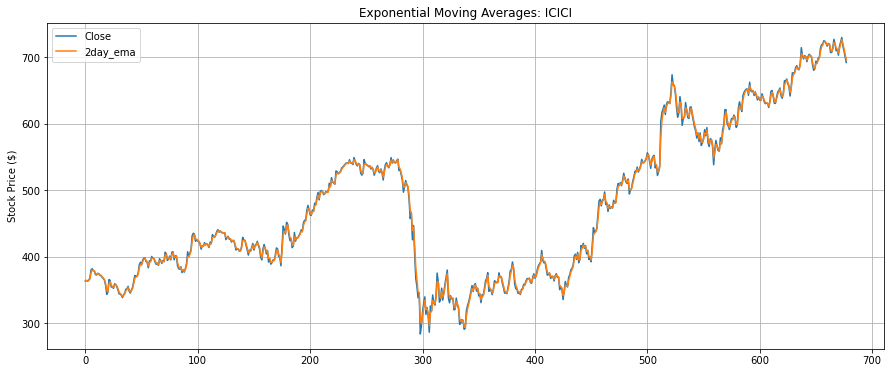

In [95]:
plot_stock_trend_ema(window_ema_var, window_size, ICICI, 'ICICI')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, ICICI)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

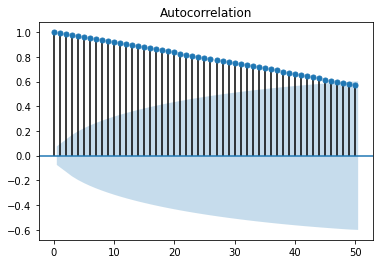

In [115]:
plot_acf(ICICI['Close'],lags=50)
plt.show()

Text(0.5, 1.0, 'ICICI monthly variability in stocks')

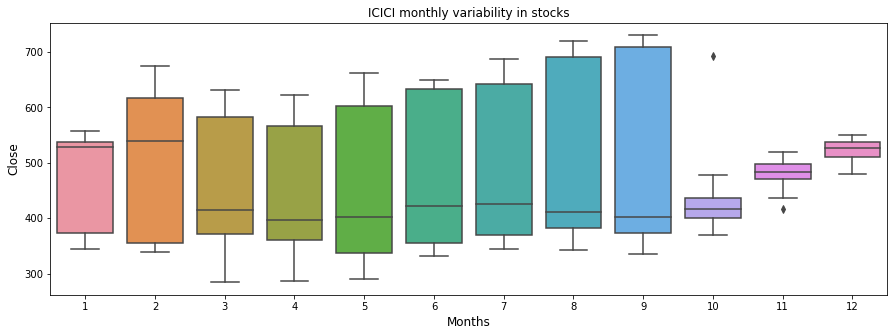

In [127]:
ICICI['return'] = ICICI['Close'].pct_change()*100
ICICI['Year'] = pd.DatetimeIndex(ICICI['Date']).year
ICICI['Month'] = pd.DatetimeIndex(ICICI['Date']).month
plt.figure(figsize=(15,5))
sns.boxplot(ICICI['Month'],ICICI['Close'])
plt.ylabel('Close', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('ICICI monthly variability in stocks')

In [143]:
# px.line(HDFC, x = 'Date', y = 'return', title = 'Return of HDFC')
# px.line(HDFC, x = 'Date', y = 'Volume', title = 'Volume of HDFC')

In [178]:
## ICICI:
X_icici, Y_icici = seqX_seqY(ICICI, 2)
m_icici = model_training(X_icici, Y_icici)

Coefficients of linear regressor:  [0.072409   0.92566548]
Linear Regression score: 99.27012035695806
Random forest regressor score: 98.90622511537902
Support Vector regressor score: 99.24657838356717


Text(0.5, 1.0, 'Linear Regression fitting plot: ICICI stock price')

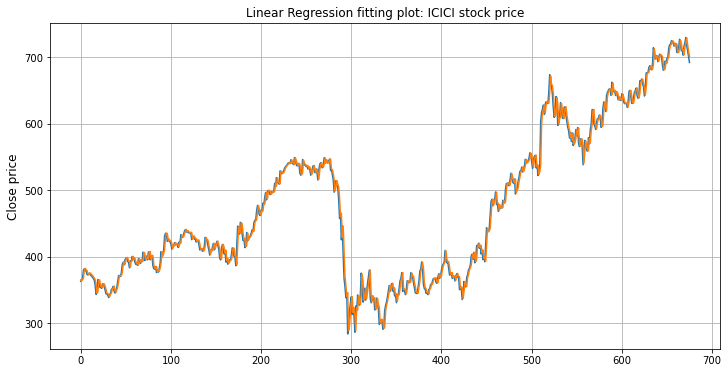

In [179]:
Y_picici = m_icici.predict(X_icici)
plt.figure(figsize=(12,6))
plt.plot(Y_icici)
plt.plot(Y_picici)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: ICICI stock price', fontsize=12)

In [99]:
Infosys = pd.read_csv('Infosys Share Prices 2019_2021.csv')
print(Infosys.shape)
print(Infosys.head())
Infosys.isnull().sum()

(249, 6)
         Date         Open         High          Low        Close      Volume
0  2020-10-05  1018.049988  1054.900024  1018.049988  1048.699951  14212509.0
1  2020-10-06  1055.000000  1060.000000  1031.349976  1055.750000   9090819.0
2  2020-10-07  1044.900024  1072.000000  1035.500000  1066.550049   9284008.0
3  2020-10-08  1090.000000  1124.000000  1088.400024  1093.699951  21482613.0
4  2020-10-09  1095.099976  1113.300049  1088.449951  1106.800049  10567867.0


Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [100]:
Infosys = Infosys.dropna()
Infosys = Infosys.set_index(pd.Index(range(0,len(Infosys))))

In [102]:
px.line(Infosys, x = 'Date', y = 'Close', title = 'Stock Trend of Infosys')

RMSE:  8.466978327318436 
MAPE:  0.39413049696034547
RMSE:  5.968420334152357 
MAPE:  0.2789573209866808


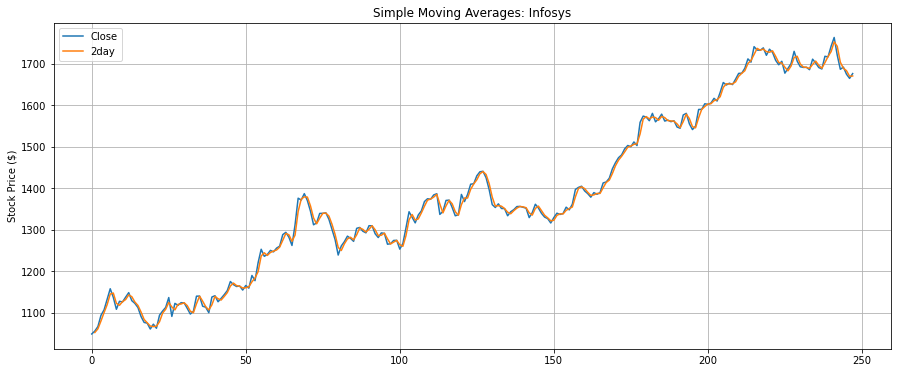

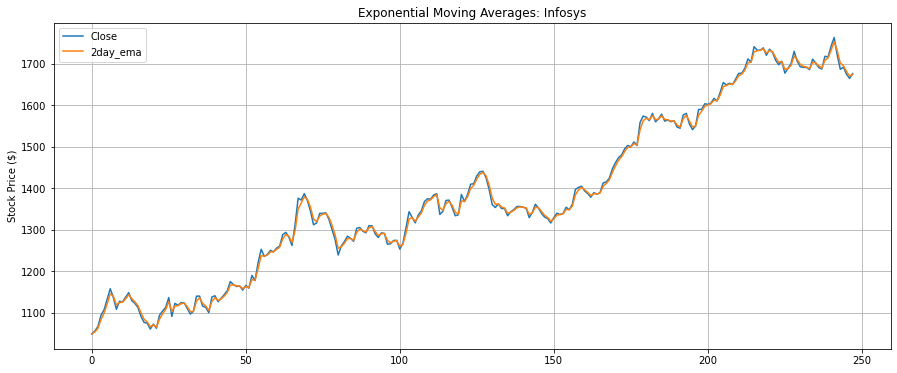

In [101]:
plot_stock_trend_sma(window_var, window_size, Infosys, 'Infosys')
rmse_sma, mape_sma = calculate_perf_metrics(window_var, Infosys)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

plot_stock_trend_ema(window_ema_var, window_size, Infosys, 'Infosys')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, Infosys)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

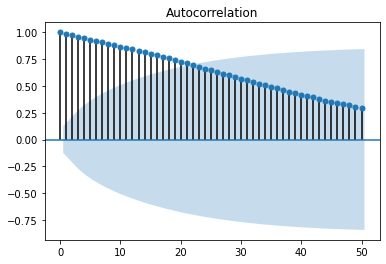

In [116]:
plot_acf(Infosys['Close'],lags=50)
plt.show()

Text(0.5, 1.0, 'Infosys monthly variability in stocks')

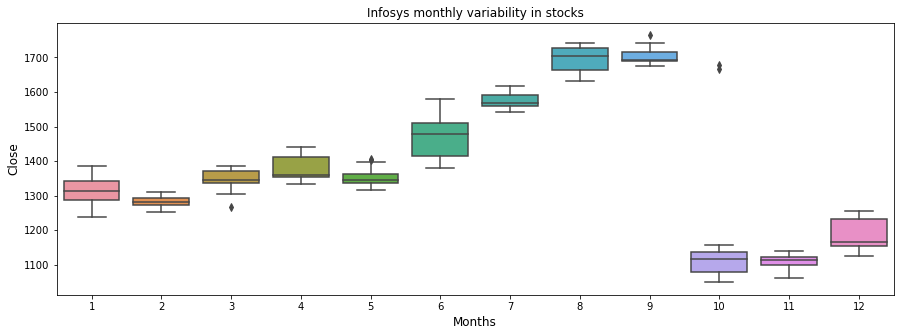

In [128]:
Infosys['return'] = Infosys['Close'].pct_change()*100
Infosys['Year'] = pd.DatetimeIndex(Infosys['Date']).year
Infosys['Month'] = pd.DatetimeIndex(Infosys['Date']).month
plt.figure(figsize=(15,5))
sns.boxplot(Infosys['Month'],Infosys['Close'])
plt.ylabel('Close', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('Infosys monthly variability in stocks')

In [141]:
# px.line(HDFC, x = 'Date', y = 'return', title = 'Return of HDFC')
# px.line(HDFC, x = 'Date', y = 'Volume', title = 'Volume of HDFC')

In [189]:
## Infosys:
X_info, Y_info = seqX_seqY(Infosys, 2)
m_info = model_training(X_info, Y_info)

Coefficients of linear regressor:  [-0.07466094  1.06687016]
Linear Regression score: 99.26481826097316
Random forest regressor score: 99.10212501562785
Support Vector regressor score: 99.2595225166431


Text(0.5, 1.0, 'Linear Regression fitting plot: Infosys stock price')

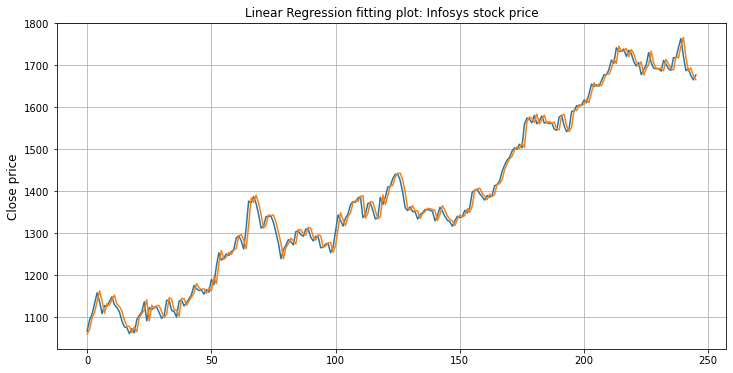

In [183]:
Y_pinfo = m_info.predict(X_info)
plt.figure(figsize=(12,6))
plt.plot(Y_info)
plt.plot(Y_pinfo)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: Infosys stock price', fontsize=12)

In [104]:
SBI = pd.read_csv('SBI Share Prices 2019_2021.csv')
print(SBI.shape)
print(SBI.head())
SBI.isnull().sum()

(680, 6)
         Date        Open        High         Low       Close      Volume
0  2019-01-01  297.500000  300.700012  293.850006  299.600006  11837127.0
1  2019-01-02  299.100006  302.500000  293.100006  293.899994  25559853.0
2  2019-01-03  295.000000  295.549988  290.100006  291.100006  17548347.0
3  2019-01-04  292.100006  299.000000  291.500000  297.649994  19514041.0
4  2019-01-07  301.049988  301.500000  295.200012  296.299988  14579399.0


Date      0
Open      2
High      2
Low       2
Close     2
Volume    2
dtype: int64

In [105]:
SBI = SBI.dropna()
SBI = SBI.set_index(pd.Index(range(0,len(SBI))))

In [121]:
px.line(SBI, x = 'Date', y = 'Close', title = 'Stock Trend of SBI')

RMSE:  3.598837384269643 
MAPE:  0.6638258846570012
RMSE:  2.463494097590726 
MAPE:  0.45985969577031804


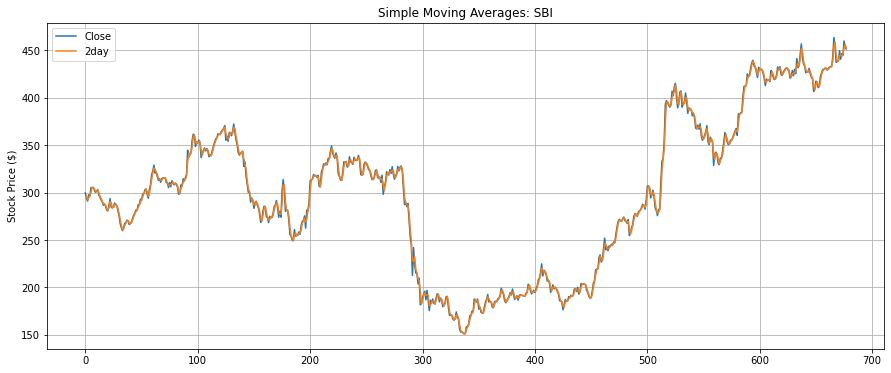

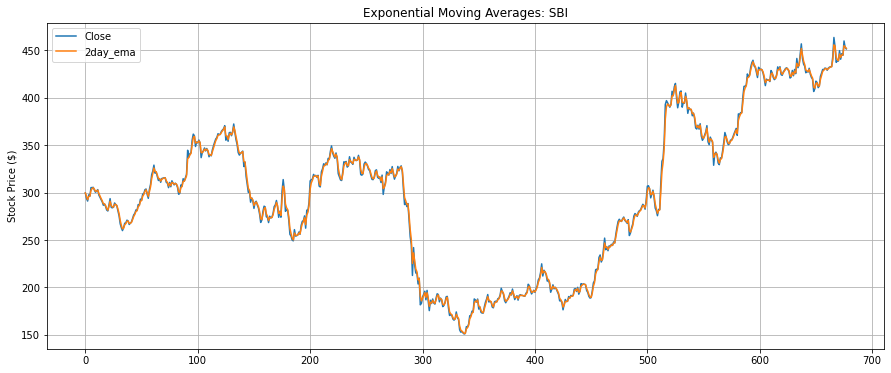

In [119]:
plot_stock_trend_sma(window_var, window_size, SBI, 'SBI')
rmse_sma, mape_sma = calculate_perf_metrics(window_var, SBI)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

plot_stock_trend_ema(window_ema_var, window_size, SBI, 'SBI')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, SBI)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

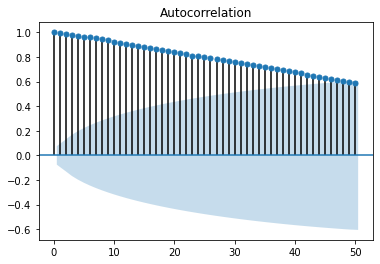

In [117]:
plot_acf(SBI['Close'],lags=50)
plt.show()

Text(0.5, 1.0, 'SBI monthly variability in stocks')

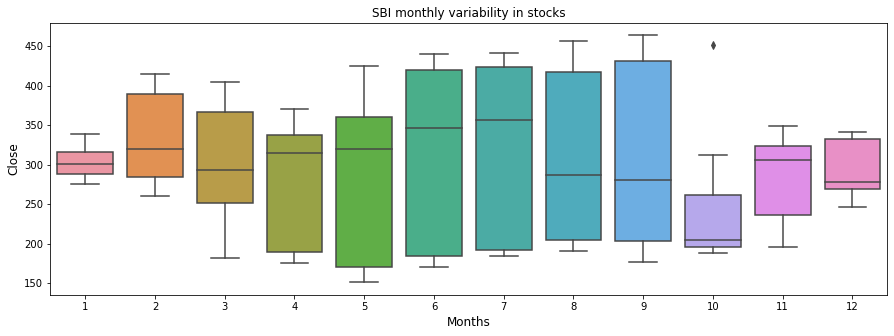

In [130]:
SBI['return'] = SBI['Close'].pct_change()*100
SBI['Year'] = pd.DatetimeIndex(SBI['Date']).year
SBI['Month'] = pd.DatetimeIndex(SBI['Date']).month
plt.figure(figsize=(15,5))
sns.boxplot(SBI['Month'],SBI['Close'])
plt.ylabel('Close', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('SBI monthly variability in stocks')

In [139]:
# px.line(HDFC, x = 'Date', y = 'return', title = 'Return of HDFC')
# px.line(HDFC, x = 'Date', y = 'Volume', title = 'Volume of HDFC')

In [185]:
## SBI:
X_sbi, Y_sbi = seqX_seqY(SBI, 2)
m_sbi = model_training(X_sbi, Y_sbi)

Coefficients of linear regressor:  [-0.01800234  1.01479431]
Linear Regression score: 99.39103176740707
Random forest regressor score: 99.17099046202422
Support Vector regressor score: 99.39025459622232


Text(0.5, 1.0, 'Linear Regression fitting plot: SBI stock price')

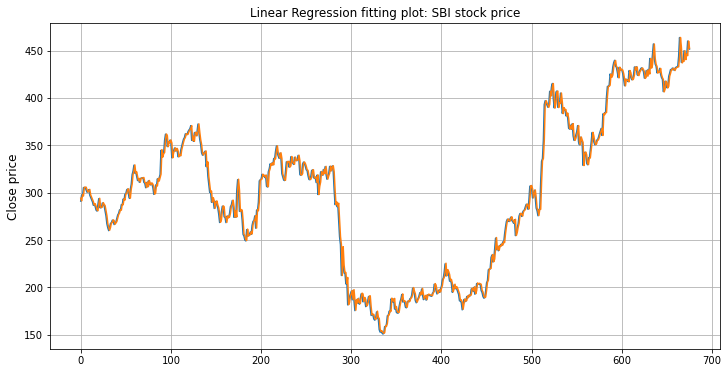

In [186]:
Y_psbi = m_sbi.predict(X_sbi)
plt.figure(figsize=(12,6))
plt.plot(Y_sbi)
plt.plot(Y_psbi)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: SBI stock price', fontsize=12)

In [107]:
USD_INR = pd.read_csv('USD-INR Exchange rate 2019_2021.csv')
print(USD_INR.shape)
print(USD_INR.head())
USD_INR.isnull().sum()

(720, 6)
         Date       Open       High        Low      Close  Adj Close
0  2019-01-01  69.709999  69.730003  69.430000  69.709999  69.709999
1  2019-01-02  69.443001  70.233002  69.443001  69.709999  69.709999
2  2019-01-03  69.959999  70.510002  69.959999  69.959999  69.959999
3  2019-01-04  70.100502  70.130302  69.599998  70.300003  70.300003
4  2019-01-07  69.525002  69.919998  69.080002  69.525002  69.525002


Date          0
Open         21
High         21
Low          21
Close        21
Adj Close    21
dtype: int64

In [108]:
USD_INR = USD_INR.dropna()
USD_INR = USD_INR.set_index(pd.Index(range(0,len(USD_INR))))

In [122]:
px.line(USD_INR, x = 'Date', y = 'Close', title = 'Stock Trend of USD-INR Exchange Rates')

RMSE:  0.1090808536191324 
MAPE:  0.1084798298037233
RMSE:  0.07970938179527591 
MAPE:  0.0782658109614293


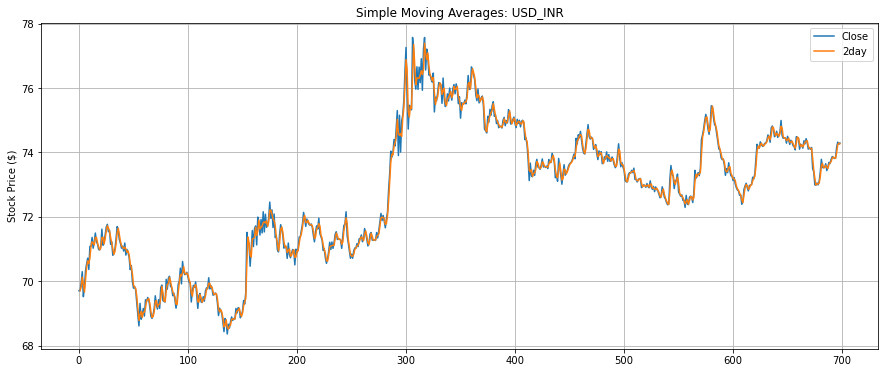

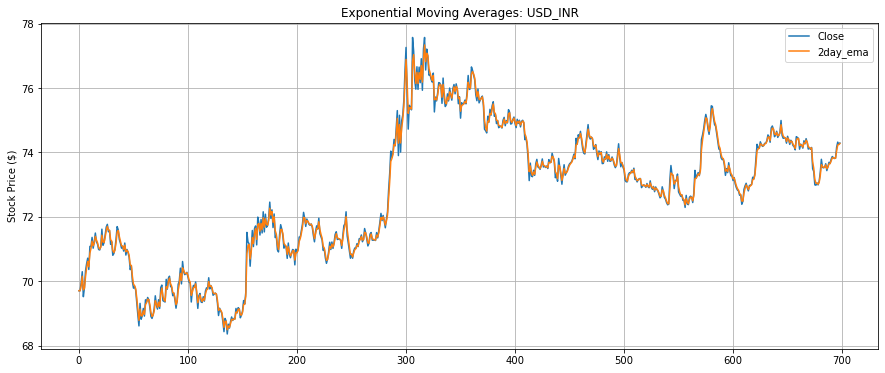

In [120]:
plot_stock_trend_sma(window_var, window_size, USD_INR, 'USD_INR')
rmse_sma, mape_sma = calculate_perf_metrics(window_var, USD_INR)
print('RMSE: ', rmse_sma, '\nMAPE: ', mape_sma)

plot_stock_trend_ema(window_ema_var, window_size, USD_INR, 'USD_INR')
rmse_ema, mape_ema = calculate_perf_metrics(window_ema_var, USD_INR)
print('RMSE: ', rmse_ema, '\nMAPE: ', mape_ema)

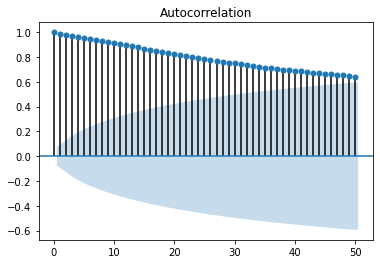

In [118]:
plot_acf(USD_INR['Close'],lags=50)
plt.show()

Text(0.5, 1.0, 'USD_INR monthly variability in stocks')

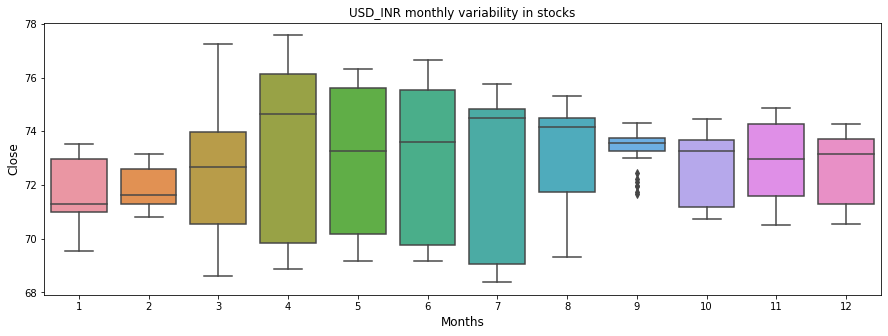

In [131]:
USD_INR['return'] = USD_INR['Close'].pct_change()*100
USD_INR['Year'] = pd.DatetimeIndex(USD_INR['Date']).year
USD_INR['Month'] = pd.DatetimeIndex(USD_INR['Date']).month
plt.figure(figsize=(15,5))
sns.boxplot(USD_INR['Month'],USD_INR['Close'])
plt.ylabel('Close', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('USD_INR monthly variability in stocks')

In [138]:
# px.line(USD_INR, x = 'Date', y = 'return', title = 'Return of USD_INR')

In [137]:
# px.line(USD_INR, x = 'Date', y = 'Volume', title = 'Volume of USD_INR')

In [187]:
## USD_INR:
X_usd, Y_usd = seqX_seqY(USD_INR, 2)
m_usd = model_training(X_usd, Y_usd)

Coefficients of linear regressor:  [0.21548799 0.76968399]
Linear Regression score: 98.10908172520669
Random forest regressor score: 97.42295320682346
Support Vector regressor score: 98.09219211089864


Text(0.5, 1.0, 'Linear Regression fitting plot: USD-INR Exchange Rates stock price')

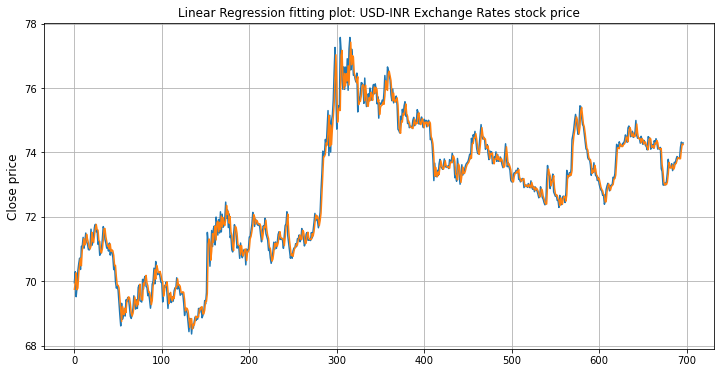

In [188]:
Y_pusd = m_usd.predict(X_usd)
plt.figure(figsize=(12,6))
plt.plot(Y_usd)
plt.plot(Y_pusd)
plt.grid(True)
plt.ylabel('Close price', fontsize=12)
plt.title('Linear Regression fitting plot: USD-INR Exchange Rates stock price', fontsize=12)